In [32]:

import scipy.signal
import matplotlib.pyplot as plt
import bk.load
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic

In [57]:
bk.load.current_session_linux()
states = bk.load.states()

lfp = bk.load.lfp_in_intervals(bk.load.random_channel('Hpc'),states['Rem'])

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.25 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 2 - 100 Hz                        
                                 Frequency Resolution is 1.25 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

Text(0.5, 1.0, 'BLA REM Sleep')

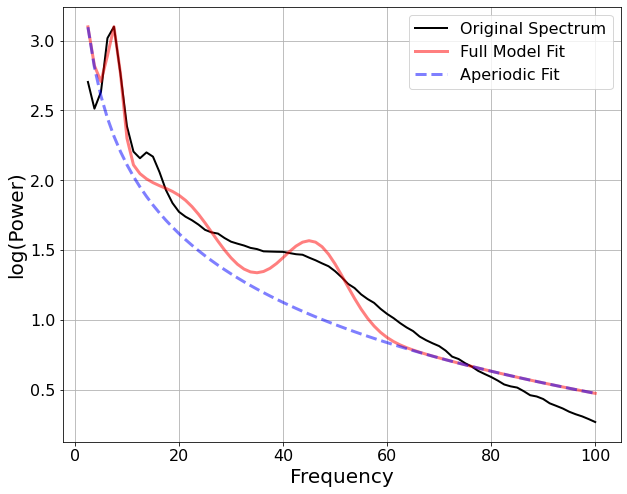

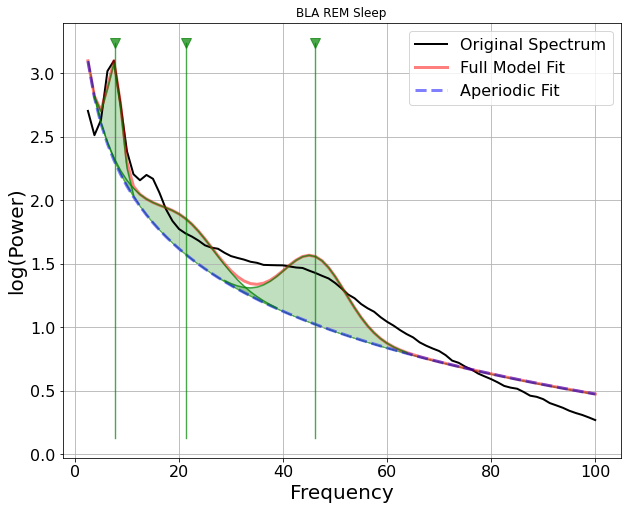

In [58]:
n = 1000
freqs, spectrum = scipy.signal.welch(lfp.values,1250,nperseg=n,noverlap=n/2)
fm = FOOOF()
freq_range = [2,100]
fm.report(freqs, spectrum, freq_range)
fm.fit(freqs,spectrum,freq_range)
fm.plot(plot_peaks='line-shade-outline')
plt.title('BLA REM Sleep')

In [59]:
init_ap_fit = init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
init_flat_spec = fm.power_spectrum - init_ap_fit

Text(0.5, 1.0, 'Hpc REM SLEEP')

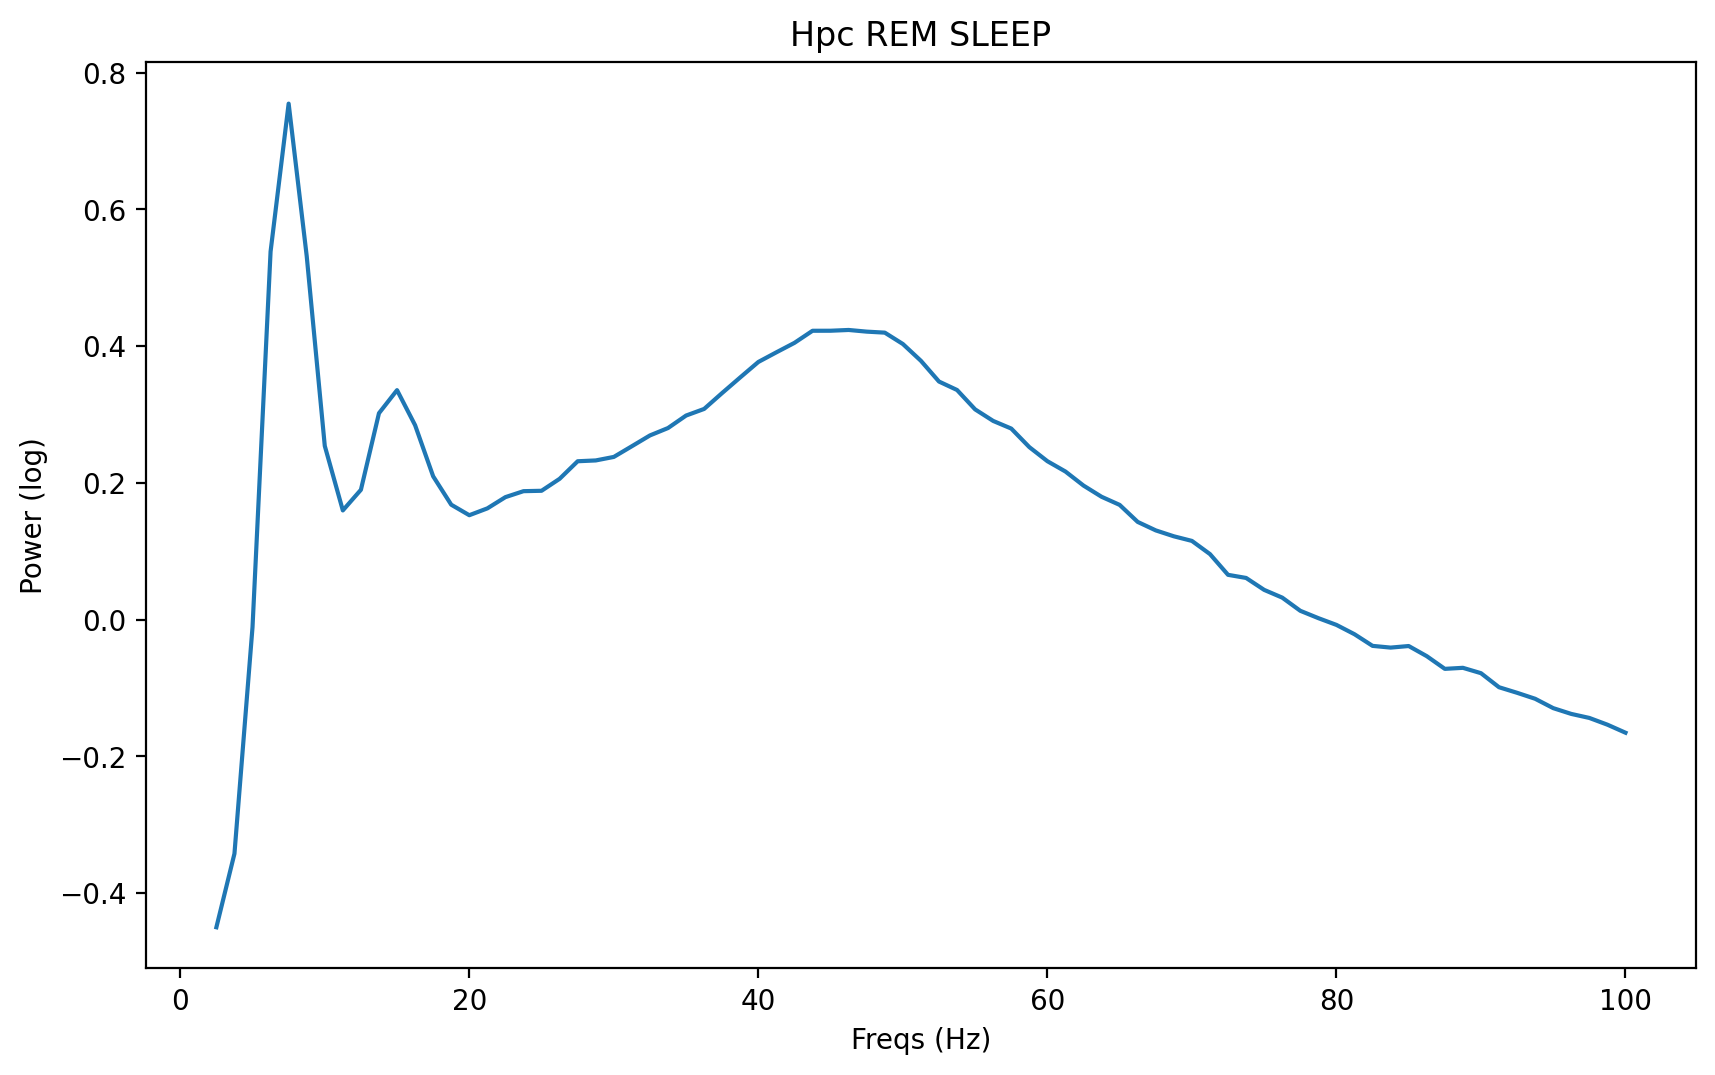

In [61]:
fig,ax = plt.subplots(1,1,figsize = (10,6),dpi = 200)
plt.plot(fm.freqs,init_flat_spec)
plt.ylabel('Power (log)')
plt.xlabel('Freqs (Hz)')
plt.title('Hpc REM SLEEP')